In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['image.cmap'] = 'inferno'

In [189]:
prices = pd.read_csv('./dataset/prices_nyse.csv', index_col=0, parse_dates=True)
prices = prices[['AAPL']]

def percent_change(series):
    previous_values = series[:-1]
    last_value = series[-1]
    
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

def replace_outliers(series):
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    series[this_mask] = np.nanmedian(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)

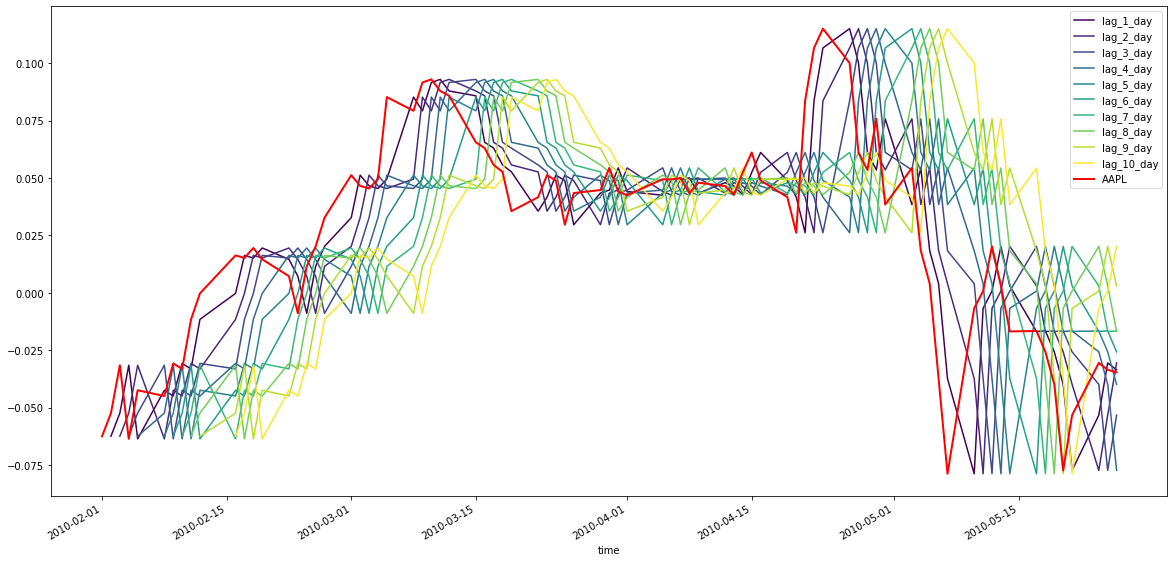

In [190]:
shifts = np.arange(1, 11).astype(int)

shifted_data = {"lag_{}_day".format(day_shift): 
                prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}

prices_perc_shifted = pd.DataFrame(shifted_data)

fig, ax = plt.subplots(figsize=(20, 10));
prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis, ax=ax);
prices_perc.iloc[:100].plot(color='r', lw=2, ax=ax);
ax.legend(loc='best');

In [187]:
shifts = - np.arange(1, 50).astype(int)

shifted_data = {"lag_{}_day".format(day_shift): 
                prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}

prices_perc_shifted_minus = pd.DataFrame(shifted_data)


In [194]:
prices_perc_shifted

,lag_1_day,lag_2_day,lag_3_day,lag_4_day,lag_5_day,lag_6_day,lag_7_day,lag_8_day,lag_9_day,lag_10_day
time,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.029110,0.038745,0.040271,0.039904,0.036806,0.038333,0.035225,0.039196,0.025843,0.034449
2016-12-27,0.028989,0.029110,0.038745,0.040271,0.039904,0.036806,0.038333,0.035225,0.039196,0.025843
2016-12-28,0.033147,0.028989,0.029110,0.038745,0.040271,0.039904,0.036806,0.038333,0.035225,0.039196


In [195]:
prices_perc_shifted_minus

,lag_-1_day,lag_-2_day,lag_-3_day,lag_-4_day,lag_-5_day,lag_-6_day,lag_-7_day,lag_-8_day,lag_-9_day,lag_-10_day,...,lag_-40_day,lag_-41_day,lag_-42_day,lag_-43_day,lag_-44_day,lag_-45_day,lag_-46_day,lag_-47_day,lag_-48_day,lag_-49_day
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045448,0.049553,0.085288,0.079318,0.091664,0.093017,0.087953,0.085862,0.065590,0.063049
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049553,0.085288,0.079318,0.091664,0.093017,0.087953,0.085862,0.065590,0.063049,0.055723
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.085288,0.079318,0.091664,0.093017,0.087953,0.085862,0.065590,0.063049,0.055723,0.052689
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.079318,0.091664,0.093017,0.087953,0.085862,0.065590,0.063049,0.055723,0.052689,0.035574
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.091664,0.093017,0.087953,0.085862,0.065590,0.063049,0.055723,0.052689,0.035574,0.041646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.033147,0.025982,0.022767,0.011417,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,0.025982,0.022767,0.011417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,0.022767,0.011417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from sklearn.linear_model import Ridge

X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

model = Ridge()
model.fit(X, y)

Ridge()

In [23]:
model.predict(X)

array([0.00901439, 0.00901439, 0.00901439, ..., 0.02722789, 0.02451108,
       0.02173092])

In [26]:
y.values

array([0.00921183, 0.00921183, 0.00921183, ..., 0.02598209, 0.02276692,
       0.0114168 ])

In [171]:
n = 500


X_train = X[:-n]
y_train = y[:-n]

X_test = X[-n:]
y_test = y[-n:]

In [172]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

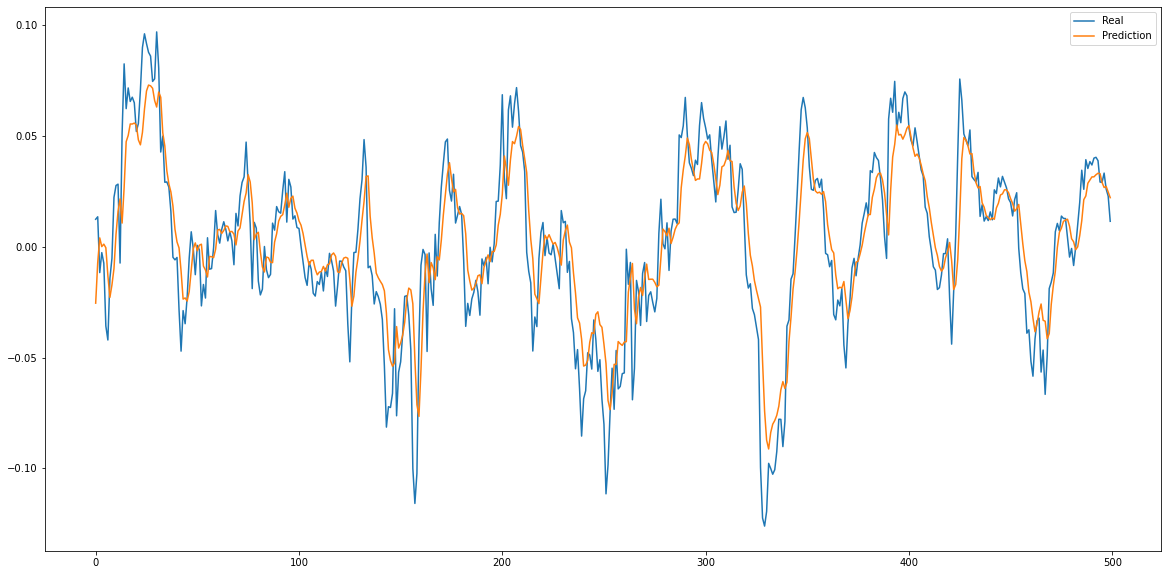

In [173]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
model = RandomForestRegressor()

In [176]:
model.fit(X_train, y_train)

RandomForestRegressor()

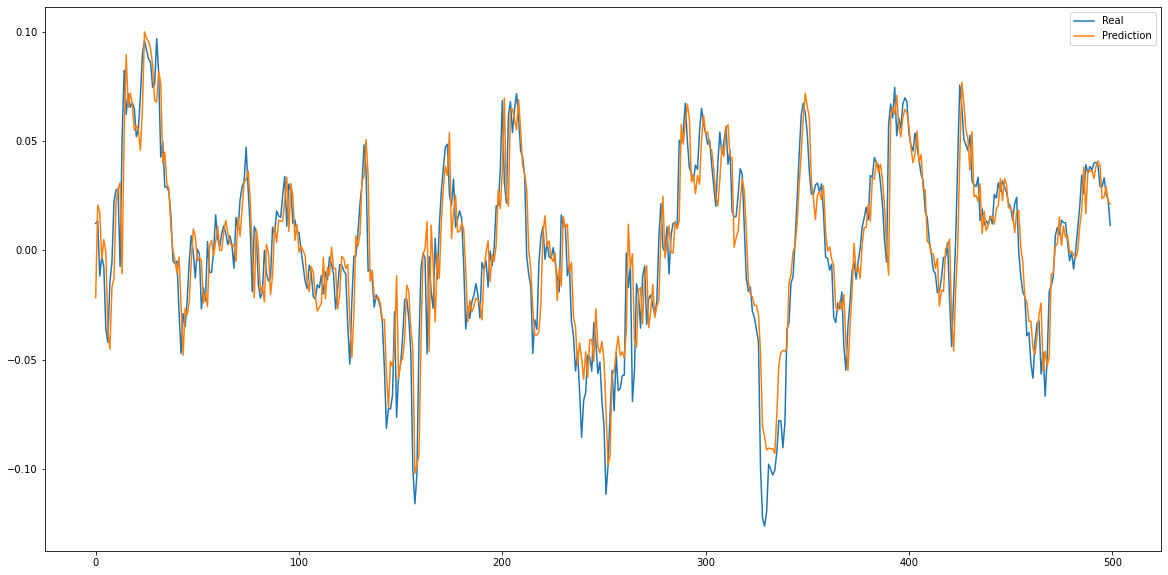

In [177]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

In [178]:
from sklearn.neural_network import MLPRegressor

In [179]:
model = MLPRegressor()

In [180]:
model.fit(X_train, y_train)

MLPRegressor()

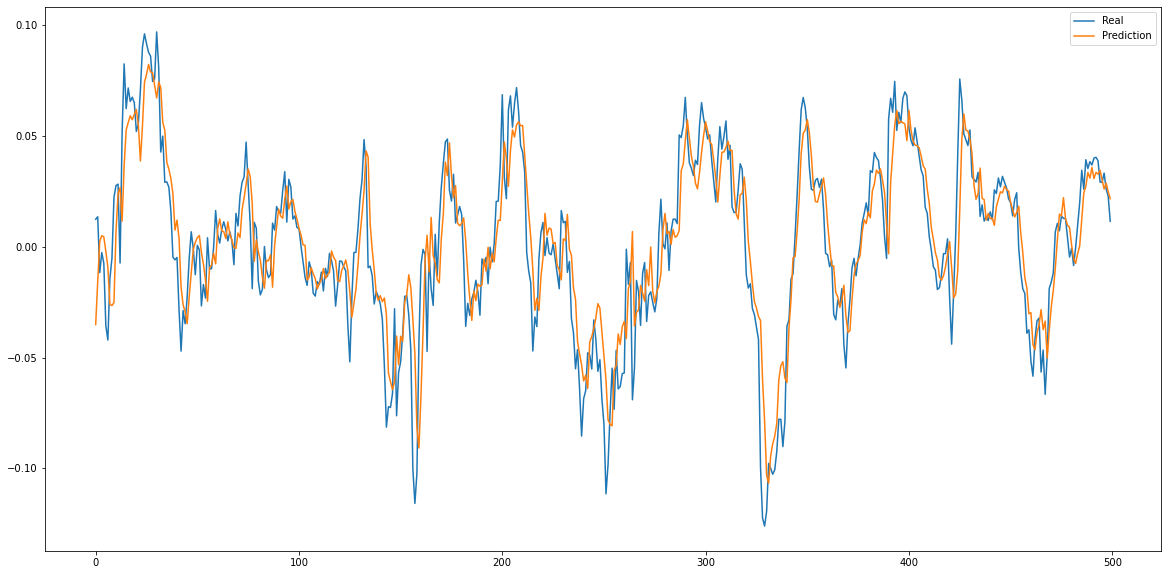

In [181]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

In [225]:
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc_shifted_minus.fillna(np.nanmedian(prices_perc_shifted_minus))

n = 500


X_train = X[:-n]
y_train = y[:-n]

X_test = X[-n:]
y_test = y[-n:]

In [226]:
model = MLPRegressor()
model.fit(X_train, y_train)

MLPRegressor()

In [236]:
X_test.shape

(500, 10)

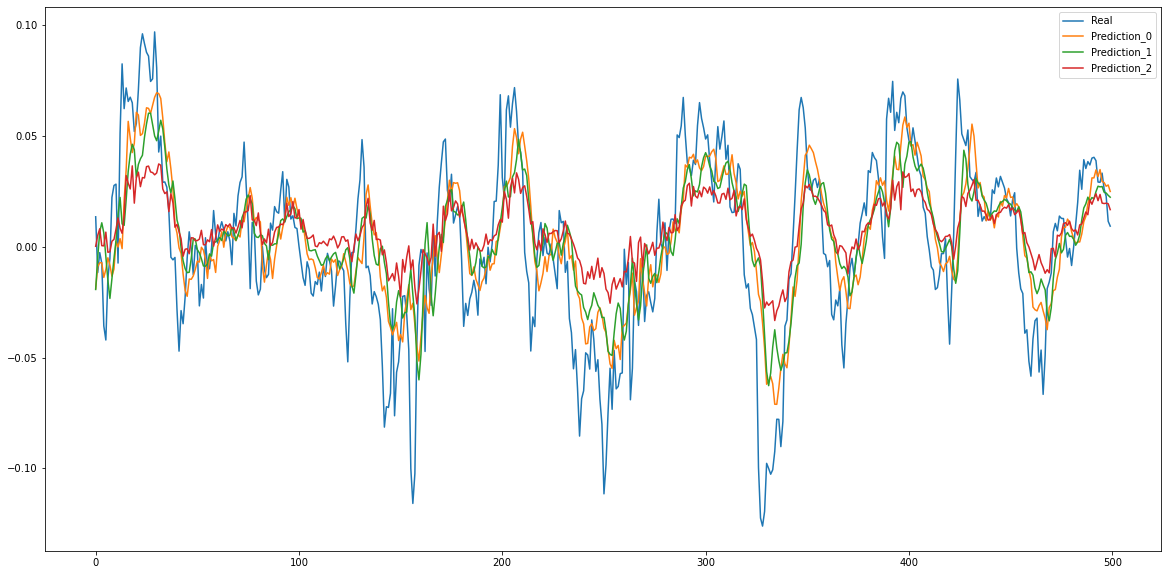

In [245]:
fig, ax = plt.subplots()
ax.plot(y_test['lag_-1_day'].values, label='Real')
ax.plot(model.predict(X_test).T[0], label='Prediction_0')
ax.plot(model.predict(X_test).T[1], label='Prediction_1')
ax.plot(model.predict(X_test).T[2], label='Prediction_2')
ax.legend()